<a href="https://colab.research.google.com/github/vu-topics-in-big-data-2021/project-energy-group6/blob/chris/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install https://github.com/retostauffer/python-colorspace
!pip install heatmapz
!pip install torch_utils

     | 194kB 23.9MB/s
  ERROR: Cannot unpack file /tmp/pip-unpack-29e059e0/python-colorspace (downloaded from /tmp/pip-req-build-kmlyjmye, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-kmlyjmye
  Created wheel for torch-utils: filename=torch_utils-0.1.2-cp37-none-any.whl size=6191 sha256=604ce61119d4b6253853587017c043095d3be9589188635e09f96ecab8af885a
  Stored in directory: /root/.cache/pip/wheels/95/61/06/139d254fa820bc1e45087dba1d719bc7d4007aec98905179c7
Successfully built torch-utils


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot

In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/vu-topics-in-big-data-2021/project-energy-group6/819ce4a4c87ac9543409eaf60d4b148aab4fe447/datasets/chiller1AndWeather_2020.csv?token=AK6SG7KLUUT7TMUV7Y5MFCLAS2XHY")
df2 = pd.read_csv("https://raw.githubusercontent.com/vu-topics-in-big-data-2021/project-energy-group6/819ce4a4c87ac9543409eaf60d4b148aab4fe447/datasets/chiller2AndWeather_2020.csv?token=AK6SG7O632ELZGYQRVLGRILAS2XI4")

df1 = df1.loc[df1["PowChi"] <= 400] #removes insane outliers 
df1 = df1.loc[df1["RunChi"] == True] # only look at data where the chiller is allowed to run
df1 = df1.drop(['Unnamed: 0'], 1)
df2 = df2.loc[df2["PowChi"] <= 400] 
df2 = df2.loc[df2["RunChi"] == True]
df2 = df2.drop(['Unnamed: 0'], 1)
df1['time'] = pd.to_datetime(df1['time'], infer_datetime_format=True)
df2['time'] = pd.to_datetime(df2['time'], infer_datetime_format=True)


df1Rain = df1.loc[df1["Precip.(in)"] > 0];
df1Dry = df1.loc[df1["Precip.(in)"] == 0];
df2Rain = df2.loc[df2["Precip.(in)"] > 0];
df2Dry = df2.loc[df2["Precip.(in)"] == 0];



In [4]:
df1.describe().to_csv('chiller1_describe.csv')
df2.describe().to_csv('chiller2_describe.csv')

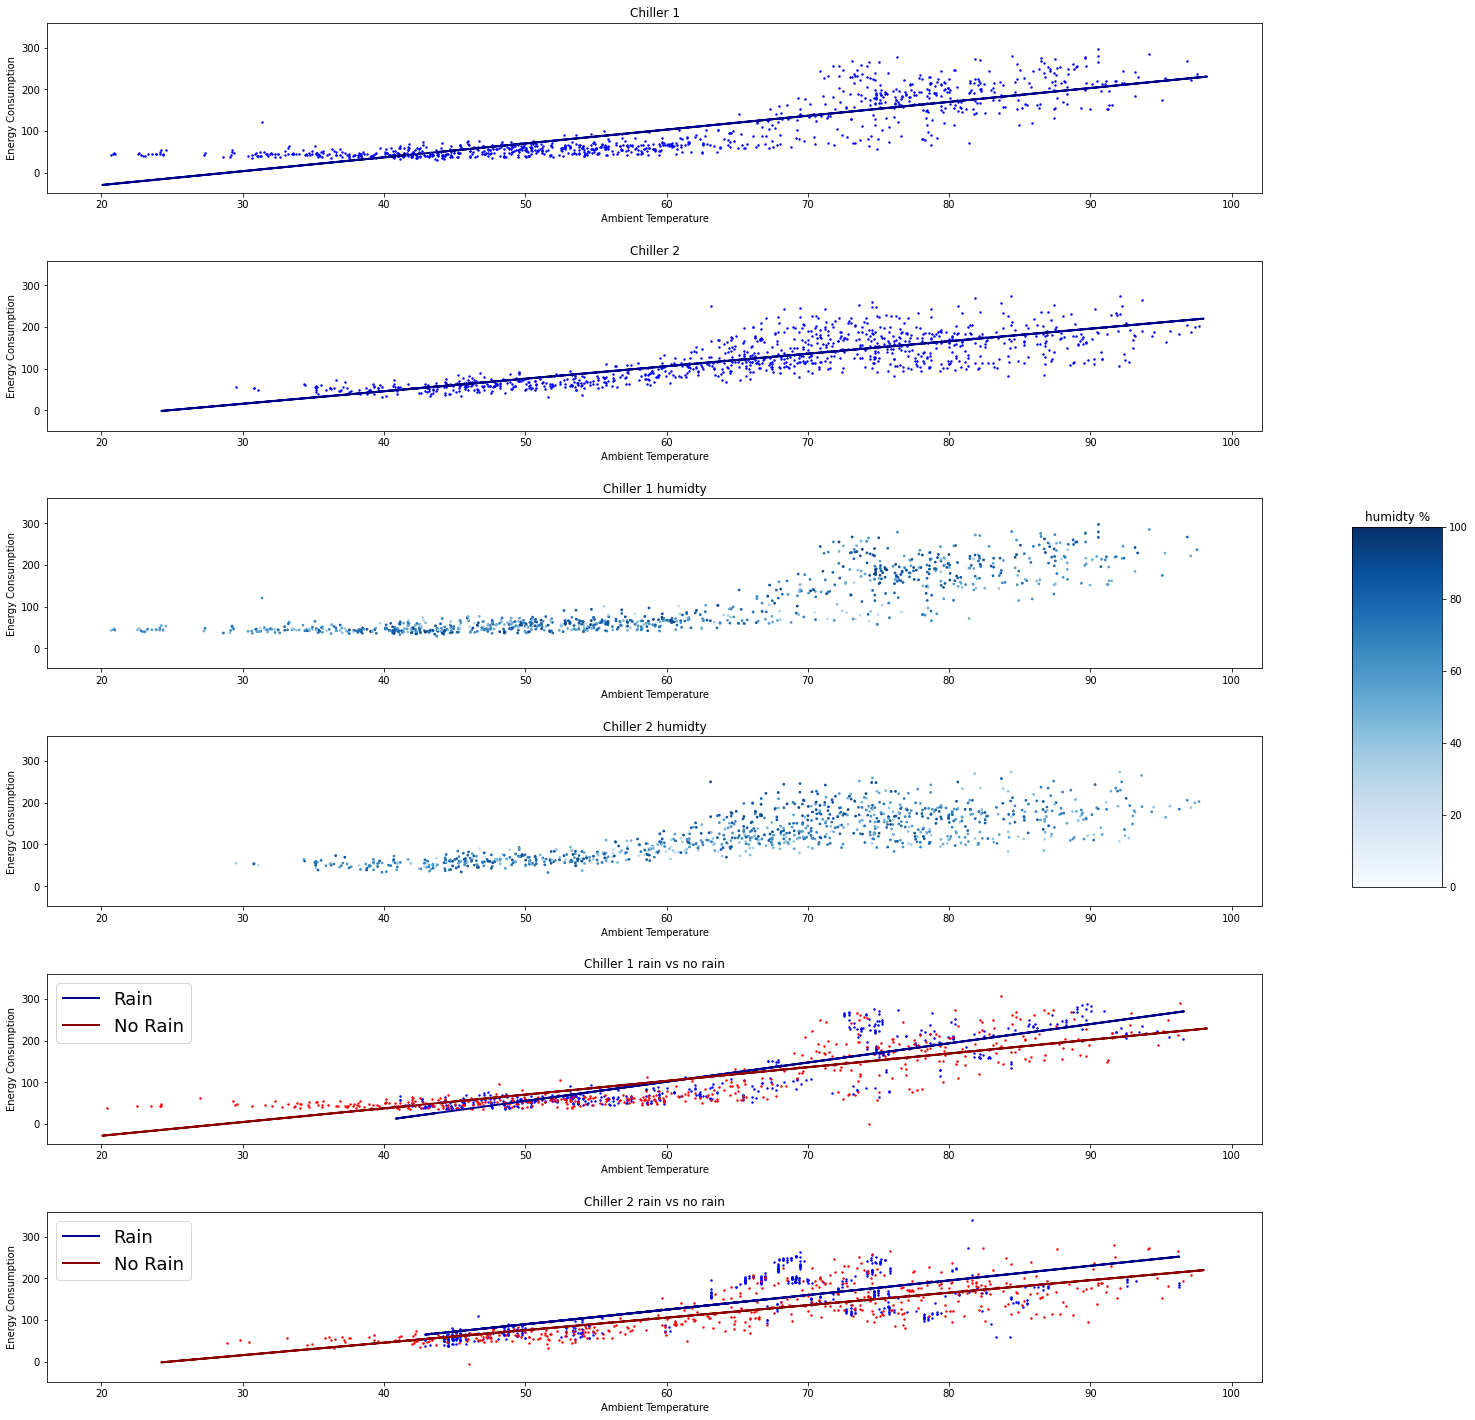

In [5]:
fig, (chiller1, chiller2, humidity1, humidity2, chiller1Rain, chiller2Rain,) = plt.subplots(6, sharey=True, sharex=True)
fig.set_size_inches(25, 25)
fig.subplots_adjust(hspace=.4)

visual1 = df1.sample(1000)
visual2 = df2.sample(1000)
chiller1.scatter(visual1["TempAmbient"],visual1["PowChi"], s=2, c="blue")
chiller2.scatter(visual2["TempAmbient"],visual2["PowChi"], s=2, c="blue")
chiller1Line = np.polyfit(df1["TempAmbient"], df1["PowChi"], 1)
chiller2Line = np.polyfit(df2["TempAmbient"], df2["PowChi"], 1)
chiller1.plot(df1["TempAmbient"], chiller1Line[0] * df1["TempAmbient"] + chiller1Line[1], color='darkblue', linewidth=2)
chiller2.plot(df2["TempAmbient"], chiller2Line[0] * df2["TempAmbient"] + chiller2Line[1], color='darkblue', linewidth=2)

chiller1.set_xlabel("Ambient Temperature")
chiller1.set_ylabel("Energy Consumption")
chiller1.set_title("Chiller 1")
chiller2.set_xlabel("Ambient Temperature")
chiller2.set_ylabel("Energy Consumption")
chiller2.set_title("Chiller 2")





humidtyColor1 = visual1["Humidity(%)"]
humidtyColor2 = visual2["Humidity(%)"]

humidity1.set_xlabel("Ambient Temperature")
humidity1.set_ylabel("Energy Consumption")
humidity1.set_title("Chiller 1 humidty")
humidity2.set_xlabel("Ambient Temperature")
humidity2.set_ylabel("Energy Consumption")
humidity2.set_title("Chiller 2 humidty")

color1 = humidity1.scatter(visual1["TempAmbient"],visual1["PowChi"], s=3, c=humidtyColor1, cmap="Blues", vmin=0, vmax=100)
color2 = humidity2.scatter(visual2["TempAmbient"],visual2["PowChi"], s=3, c=humidtyColor2, cmap="Blues", vmin=0, vmax=100)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.2])
cbar_ax.set_title("humidty %")
fig.colorbar(color1, cax=cbar_ax)




chiller1RainVisual = df1Rain.sample(500)
chiller1DryVisual = df1Dry.sample(500)
chiller2RainVisual = df2Rain.sample(500)
chiller2DryVisual = df2Dry.sample(500)
chiller1RainLine = np.polyfit(df1Rain["TempAmbient"], df1Rain["PowChi"], 1)
chiller1DryLine = np.polyfit(df1Dry["TempAmbient"], df1Dry["PowChi"], 1)

chiller1Rain.set_xlabel("Ambient Temperature")
chiller1Rain.set_ylabel("Energy Consumption")
chiller1Rain.set_title("Chiller 1 rain vs no rain")
chiller2Rain.set_xlabel("Ambient Temperature")
chiller2Rain.set_ylabel("Energy Consumption")
chiller2Rain.set_title("Chiller 2 rain vs no rain")

chiller2RainLine = np.polyfit(df2Rain["TempAmbient"], df2Rain["PowChi"], 1)
chiller2DryLine = np.polyfit(df2Dry["TempAmbient"], df2Dry["PowChi"], 1)
chiller1Rain.scatter(chiller1RainVisual["TempAmbient"],chiller1RainVisual["PowChi"], s=2, c="blue")
chiller1Rain.scatter(chiller1DryVisual["TempAmbient"],chiller1DryVisual["PowChi"], s=2, c="red")

chiller2Rain.scatter(chiller2RainVisual["TempAmbient"],chiller2RainVisual["PowChi"], s=2, c="blue")
chiller2Rain.scatter(chiller2DryVisual["TempAmbient"],chiller2DryVisual["PowChi"], s=2, c="red")

chiller1Rain.plot(df1Rain["TempAmbient"], chiller1RainLine[0] * df1Rain["TempAmbient"] + chiller1RainLine[1], color='darkblue', linewidth=2, label="Rain")
chiller1Rain.plot(df1Dry["TempAmbient"], chiller1DryLine[0] * df1Dry["TempAmbient"] + chiller1DryLine[1], color='darkred', linewidth=2, label="No Rain")
chiller2Rain.plot(df2Rain["TempAmbient"], chiller2RainLine[0] * df2Rain["TempAmbient"] + chiller2RainLine[1], color='darkblue', linewidth=2, label="Rain")
chiller2Rain.plot(df2Dry["TempAmbient"], chiller2DryLine[0] * df2Dry["TempAmbient"] + chiller2DryLine[1], color='darkred', linewidth=2, label="No Rain")

chiller1Rain.legend(fontsize=18)
chiller2Rain.legend(fontsize=18)


chiller1.xaxis.set_tick_params(labelbottom=True)
chiller2.xaxis.set_tick_params(labelbottom=True)
humidity1.xaxis.set_tick_params(labelbottom=True)
humidity2.xaxis.set_tick_params(labelbottom=True)
chiller1Rain.xaxis.set_tick_params(labelbottom=True)
chiller2Rain.xaxis.set_tick_params(labelbottom=True)













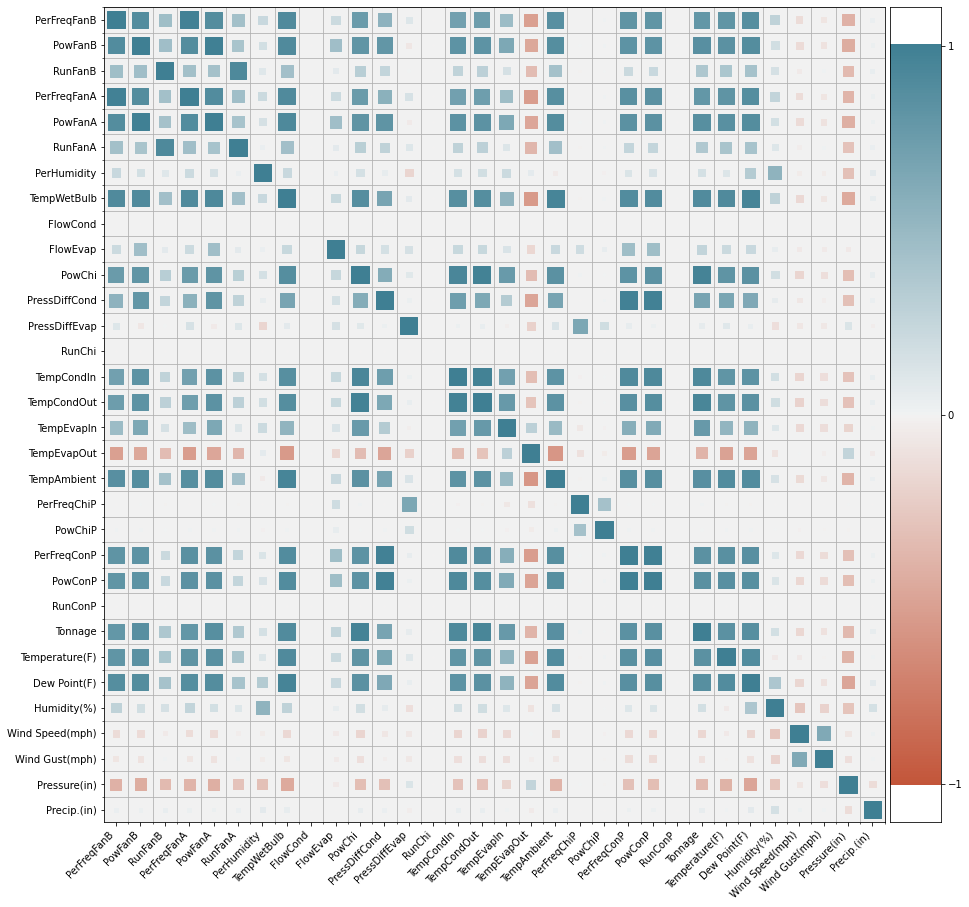

In [6]:
plt.figure(figsize=(15, 15))
corrplot(df1.corr(), size_scale=300);

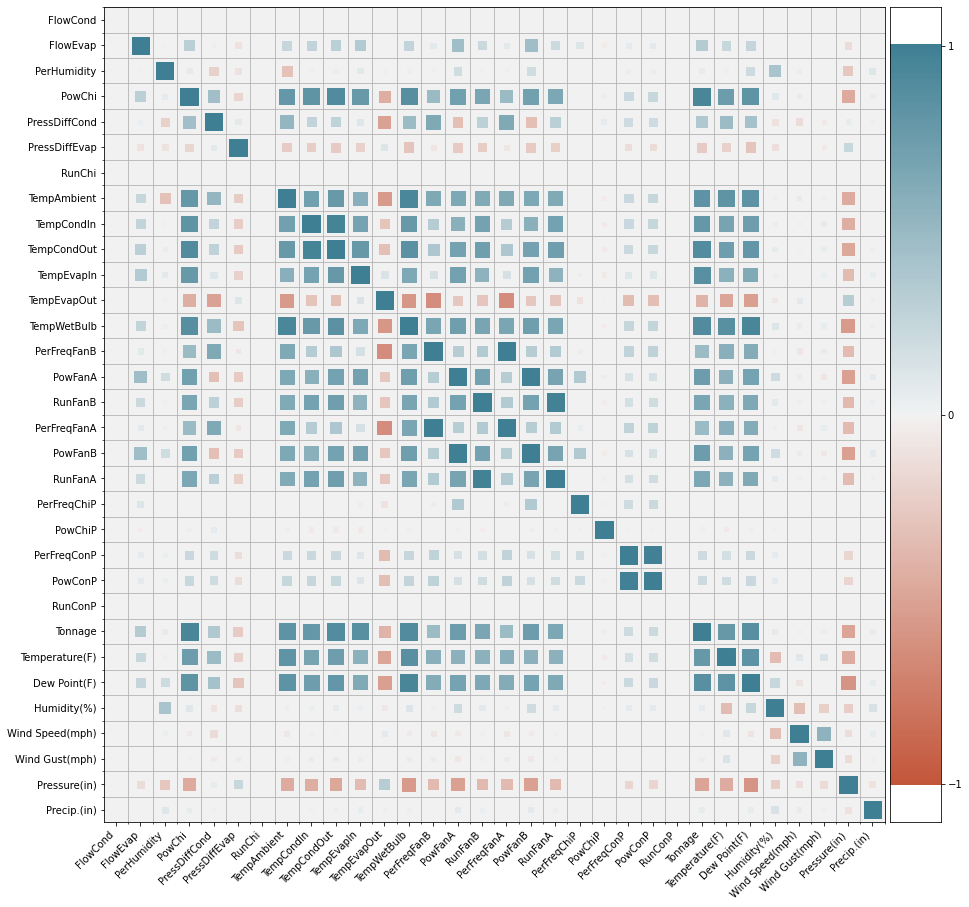

In [7]:
plt.figure(figsize=(15, 15))
corrplot(df2.corr(), size_scale=300);

From the above heatmap, we discover that the variables most correlated to power consumption are: TempCondIn, TempCondOut, and Tonnage. It makes sense that TempCondIn and TempCondOut would be directly correlated with consumption, however they are not interesting in terms of predictive models. Tonnage is total cooling by the HVAC. I would like to explore times when PowChi is high and Tonnage is low. 

# Neural Network Helper Functions

In [8]:
import datetime
from timeit import default_timer as timer

import torch
from torch import cuda
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader, sampler, Dataset
import torch.nn.functional as F

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import feature_selection

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
def train(model, 
          criterion, 
          optimizer, 
          train_loader, 
          val_loader, 
          max_epochs_stop=3, 
          n_epochs=10,
          early_stop=False,
          calc_accuracy = False, 
          save_file_name=f'best_model.pt'):
  #early stoping init
  epochs_no_improve = 0
  valid_loss_min = np.Inf
  valid_max_acc = 0
  history = []

  # Number of epochs already trained (if using loaded in model weights)
  try:
    print(f'Model has been trained for: {model.epochs} epochs.\n')
  except:
    model.epochs = 0
    print(f'Starting Training from Scratch.\n')

  overall_start = timer()

  for epoch in range(n_epochs):
    train_loss = 0
    valid_loss = 0

    train_acc = 0
    valid_acc = 0

    model.train()
    start = timer()

    for x, y in train_loader:
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)

      loss = criterion(output, y)

      loss.backward()
      optimizer.step()

      train_loss += loss.item() * y.size(0)

      if calc_accuracy:
        # Calculate accuracy by finding max log probability            
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(y.data.view_as(pred))
        
        # Need to convert correct tensor from int to float to average            
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        
        # Multiply average accuracy times the number of examples in batch            
        train_acc += accuracy.item() * x.size(0)

    # Validation
    with torch.no_grad():
      model.epochs += 1
      model.eval()

      for x, y in val_loader:
        x, y = x.to(device), y.to(device)

        output = model(x)

        loss = criterion(output, y)

        valid_loss += loss.item() * y.size(0)

        if calc_accuracy:
          # Calculate validation accuracy                    
          _, pred = torch.max(output, dim=1)
          correct_tensor = pred.eq(y.data.view_as(pred))
          accuracy = torch.mean(
              correct_tensor.type(torch.FloatTensor))                    

          # Multiply average accuracy times the number of examples                   
          valid_acc += accuracy.item() * x.size(0)             


      # Calculate average losses                
      train_loss = train_loss / len(train_loader.dataset)
      valid_loss = valid_loss / len(val_loader.dataset)  

      if calc_accuracy:
        # Calculate average accuracy                
        train_acc = train_acc / len(train_loader.dataset)
        valid_acc = valid_acc / len(val_loader.dataset)

        history.append([train_loss, valid_loss, train_acc, valid_acc])
        print(
          f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
        )
        print(
          f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
        )
      else:
        history.append([train_loss, valid_loss])
        print(
          f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
        )


            # Save the model if validation loss decreases
      if valid_loss < valid_loss_min:
          # Save model
          torch.save(model.state_dict(), save_file_name)
          # Track improvement
          epochs_no_improve = 0
          valid_loss_min = valid_loss
          valid_best_acc = valid_acc
          best_epoch = epoch

      else:
          epochs_no_improve += 1
          # Trigger early stopping
          if epochs_no_improve >= max_epochs_stop:
              print(
                  f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.5f}'
              )
              # Load the best state dict                        
              model.load_state_dict(torch.load(save_file_name))

              model.optimizer = optimizer
              if calc_accuracy:
                history = pd.DataFrame(history, columns=['train_loss', 'valid_loss',  'train_acc', 'valid_acc'])
              else:
                history = pd.DataFrame(history, columns=['train_loss', 'valid_loss'])

              return model, history

    
  model.optimizer = optimizer
  if calc_accuracy:
    history = pd.DataFrame(history, columns=['train_loss', 'valid_loss',  'train_acc', 'valid_acc'])
  else:
    history = pd.DataFrame(history, columns=['train_loss', 'valid_loss'])
  return model, history

In [36]:
from google.colab import files

def train_lstm(model, 
          criterion, 
          optimizer, 
          train_loader, 
          val_loader, 
          n_epochs=50,
          batch_size=1,
          print_every=10,
          early_stop=0,
          clip=5,
          save_file_name=f'best_lstm.pt',
          download_every=100):
  counter = 0
  epochs_since_improve=0
  valid_loss_min = np.inf
  history = []

  model.train()
  for epoch in range(n_epochs):
    h = model.init_hidden(batch_size)

    for inputs, labels in train_loader:
      counter += 1

      h = tuple([e.data for e in h])
      inputs, labels = inputs.to(device), labels.to(device)
      model.zero_grad()
      output, h = model(inputs, h)
      output = output.view(-1,1)
      loss = criterion(output, labels.float())
      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()   

    if epoch % print_every == 0:
      val_h = model.init_hidden(batch_size)
      val_losses = []
      model.eval()
      for inp, lab in val_loader:
        val_h = tuple([each.data for each in val_h])
        inp, lab = inp.to(device), lab.to(device)
        out, val_h = model(inp, val_h)
        out = out.view(-1,1)
        val_loss = criterion(out, lab.float())
        val_losses.append(val_loss.item())
          
      model.train()
      print("Epoch: {}/{}...".format(epoch+1, n_epochs),
            "Step: {}...".format(counter),
            "Loss: {:.6f}...".format(loss.item()),
            "Val Loss: {:.6f}".format(np.mean(val_losses)))
      
      history.append([loss.item(), np.mean(val_losses)])

      if np.mean(val_losses) <= valid_loss_min:
        torch.save(model.state_dict(), save_file_name)
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
        valid_loss_min = np.mean(val_losses)
        epochs_since_improve=0
      else:
        epochs_since_improve += 1

      if early_stop > 0:
        if epochs_since_improve > early_stop:
          history = pd.DataFrame(history, columns=['train loss', 'validation loss'])
          model.load_state_dict(torch.load(save_file_name))
          return model, history

      if epoch % download_every == 0:
        print('downloading model')
        files.download(save_file_name)

  history = pd.DataFrame(history, columns=['train loss', 'validation loss'])
  model.load_state_dict(torch.load(save_file_name))
  return model, history

In [11]:
def plot_loss(history):
  plt.figure(figsize=(8, 6))
  for c in ['train_loss', 'valid_loss']:
      plt.plot(
          history[c], label=c)
  plt.legend()
  plt.xlabel('Epoch')
  plt.ylabel('Average Negative Log Likelihood')
  plt.title('Training and Validation Losses')
  plt.show()

In [12]:
def print_power_predictions(model, dataset, n=5, print_every=True, plot=False):
  with torch.no_grad():
    model.eval()

    rel_error = np.ones(n)
    targets = np.ones(n)
    for i in range(n):
      X, y = dataset[i][0].to(device), dataset[i][1].numpy()[0]
      pred = model(X).cpu().numpy()[0]

      if y != 0 and (abs(pred - y) / y) < 5:
        targets[i] = y
        rel_error[i] = (abs(pred - y) / y) * 100

      if print_every:
        print('{} : Predicted power consumption: {} : Actual power consumption: {} : Relative Error: {}'.format(i, pred, y, str(rel_error[i]) + '%'))
    
    avg_error = np.average(rel_error)
    print('Average relative error: {}'.format(avg_error))

    if plot:
      plt.figure(figsize=(8, 6))
      plt.scatter(targets, rel_error)
      plt.xlabel('Target Value')
      plt.ylabel('Relative Error')
      plt.show()


In [13]:
def test_lstm(model, dataset, print_every=False):
  with torch.no_grad():
    model.eval()

    n = len(dataset)

    h = model.init_hidden(1)
    rel_error = np.ones(n)

    for i in range(n):
      X, y = dataset[i][0].to(device), dataset[i][1].numpy()[0]
      h = tuple([each.data for each in h])
      X = torch.reshape(X, (X.shape[0], 1, X.shape[1])).float()
      pred, h = model(X, h)

      error = (abs(pred - y) / y) * 100
      if y!= 0 and error < 500:
        rel_error[i] = (abs(pred - y) / y) * 100
      else: 
        rel_error[i] = 500     

      if print_every:
        print('{} : Predicted power consumption: {} : Actual power consumption: {} : Relative Error: {}'.format(i, pred, y, str(rel_error[i]) + '%')) 

    avg_error = np.average(rel_error)  
    print('Average relative error: {}'.format(avg_error))

# Artificial Neural Network

In [20]:
class FullyConnectedModel(nn.Module):
  # h_sizes is an arraylike that gives the size of each hidden layer, nout is number of outputs
  # dropout is the dropout rate at each layer
  def __init__(self, h_sizes, nout, dropout=0.5):
    super(FullyConnectedModel, self).__init__()

    self.hidden = nn.ModuleList()
    for i in range(len(h_sizes)-1):
      self.hidden.append(nn.Linear(h_sizes[i], h_sizes[i + 1]))
    
    self.out = nn.Linear(h_sizes[len(h_sizes)-1], nout)
    self.dropout = nn.Dropout(dropout)

  def forward(self, x):
    for layer in self.hidden:
      x = self.dropout(F.relu(layer(x)))
    x = self.out(x)
    return x

In [19]:
df1['weekday'] = df1['time'].apply(lambda date: date.weekday())
df2['weekday'] = df2['time'].apply(lambda date: date.weekday())

df1['hour'] = df1['time'].apply(lambda date: date.hour)
df2['hour'] = df2['time'].apply(lambda date: date.hour)

# ANN for chiller1 power consumption

In [58]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['PowChi']

X = df1[features]
y = df1[targets]

X.describe().to_csv('features_describe.csv')

for col in cat_features:
  X = X.join(pd.get_dummies(df1[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [59]:
batch_size = 200

# Transfer the data from numpy to tensor
data = {
    'train': TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float()),
    'valid': TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float()),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=10),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True, num_workers=10)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


FullyConnectedModel(
  (hidden): ModuleList(
    (0): Linear(in_features=68, out_features=102, bias=True)
    (1): Linear(in_features=102, out_features=68, bias=True)
  )
  (out): Linear(in_features=68, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

Starting Training from Scratch.



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Epoch: 0 	Training Loss: 68.8957 	Validation Loss: 44.7473

Epoch: 1 	Training Loss: 38.0594 	Validation Loss: 28.4753

Epoch: 2 	Training Loss: 25.6381 	Validation Loss: 20.2520

Epoch: 3 	Training Loss: 21.3381 	Validation Loss: 17.1320

Epoch: 4 	Training Loss: 19.3829 	Validation Loss: 15.4512

Epoch: 5 	Training Loss: 18.4021 	Validation Loss: 14.4932

Epoch: 6 	Training Loss: 17.7593 	Validation Loss: 13.9983

Epoch: 7 	Training Loss: 17.3424 	Validation Loss: 13.7530

Epoch: 8 	Training Loss: 17.2493 	Validation Loss: 13.6250

Epoch: 9 	Training Loss: 17.0945 	Validation Loss: 13.3897

Epoch: 10 	Training Loss: 16.8212 	Validation Loss: 13.4957

Epoch: 11 	Training Loss: 16.7228 	Validation Loss: 13.0543

Epoch: 12 	Training Loss: 16.4794 	Validation Loss: 12.8746

Epoch: 13 	Training Loss: 16.4862 	Validation Loss: 12.7816

Epoch: 14 	Training Loss: 16.3314 	Validation Loss: 12.6353

Epoch: 15 	Training Loss: 16.2330 	Validation Loss: 12.5588

Epoch: 16 	Training Loss: 16.3065

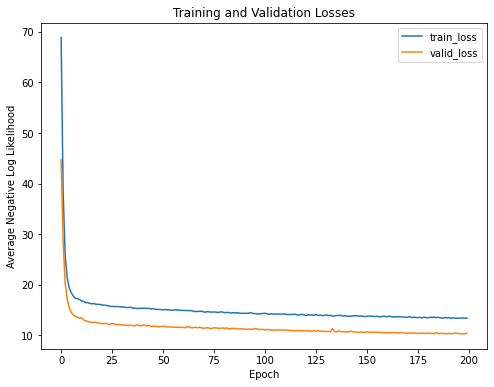

In [60]:
lr = .001
epochs = 200

nin = len(X.columns)
nout = len(y.columns)

size = nin
h_sizes = [nin, int(nin * 1.5), nin]

model = FullyConnectedModel(h_sizes, nout, .25)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)

model, history = train(
    model, 
    criterion, 
    optimizer, 
    dataloaders['train'], 
    dataloaders['valid'],
    max_epochs_stop=10, 
    n_epochs=epochs,
    early_stop=True,
    save_file_name=f'chiller1_powchi.pt')

plot_loss(history)

Average relative error: 10.041850227447192


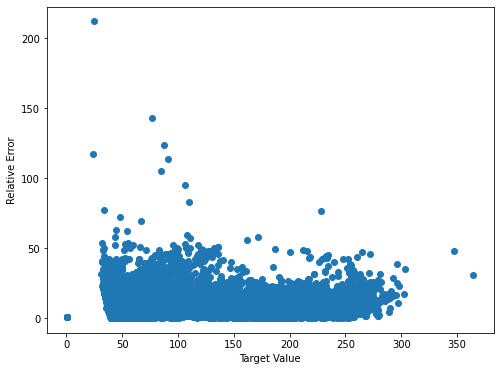

In [61]:
print_power_predictions(model, data['valid'], len(data['valid']), print_every=False, plot=True)

# ANN for chiller2 power consumption

In [79]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['PowChi']

X = df2[features]
y = df2[targets]

for col in cat_features:
  X = X.join(pd.get_dummies(df2[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [80]:
batch_size = 200

# Transfer the data from numpy to tensor
data = {
    'train': TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float()),
    'valid': TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float()),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True)
}

FullyConnectedModel(
  (hidden): ModuleList(
    (0): Linear(in_features=61, out_features=91, bias=True)
    (1): Linear(in_features=91, out_features=61, bias=True)
  )
  (out): Linear(in_features=61, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

Starting Training from Scratch.


Epoch: 0 	Training Loss: 90.8236 	Validation Loss: 41.5355

Epoch: 1 	Training Loss: 39.5902 	Validation Loss: 34.5503

Epoch: 2 	Training Loss: 33.0979 	Validation Loss: 27.6736

Epoch: 3 	Training Loss: 28.2856 	Validation Loss: 23.6196

Epoch: 4 	Training Loss: 25.8584 	Validation Loss: 22.0205

Epoch: 5 	Training Loss: 25.1019 	Validation Loss: 21.3751

Epoch: 6 	Training Loss: 24.4425 	Validation Loss: 20.7170

Epoch: 7 	Training Loss: 24.1202 	Validation Loss: 20.2526

Epoch: 8 	Training Loss: 23.6867 	Validation Loss: 20.0277

Epoch: 9 	Training Loss: 23.5296 	Validation Loss: 19.5881

Epoch: 10 	Training Loss: 23.1403 	Validation Loss: 19.4083

Epoch: 11 	Training Loss: 22.9540 	Validation Loss: 19.1492

Epoch: 12 	Training Loss: 22.7761 	Validation Loss: 19.0721

Epoch: 13 	Training Loss: 22.8387 	Validation Loss: 18.7691

Epoch: 14 	Training Loss: 22.5458 	Validation Loss: 18.6867

Epoch: 15 	Training Loss: 22.4919 	Validation Loss: 18.7039



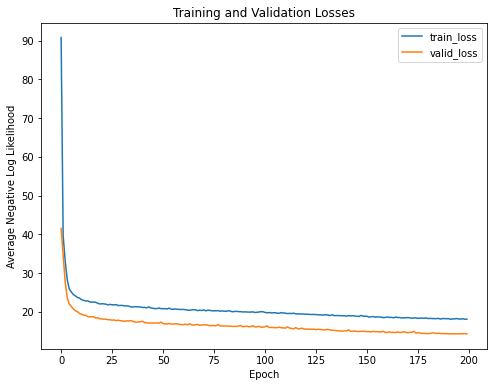

In [82]:
lr = .001
epochs = 200

nin = len(X.columns)
nout = len(y.columns)

size = nin
h_sizes = [nin, int(nin * 1.5), nin]

model = FullyConnectedModel(h_sizes, nout, .25)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)

model, history = train(
    model, 
    criterion, 
    optimizer, 
    dataloaders['train'], 
    dataloaders['valid'],
    max_epochs_stop=10, 
    n_epochs=epochs,
    early_stop=True,
    save_file_name=f'chiller2_powchi.pt')

plot_loss(history)

Average relative error: 12.243376184440104


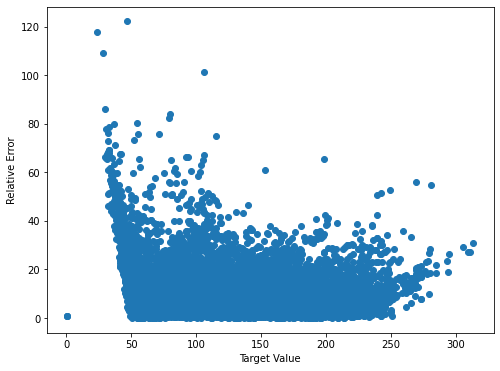

In [83]:
print_power_predictions(model, data['valid'], len(data['valid']), print_every=False, plot=True)

# ANN for chiller1 total cooling

In [105]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['Tonnage']

t_df1 = df1[features + cat_features + targets].dropna()

X = t_df1[features]
y = t_df1[targets]

for col in cat_features:
  X = X.join(pd.get_dummies(t_df1[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [106]:
batch_size = 200

# Transfer the data from numpy to tensor
data = {
    'train': TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float()),
    'valid': TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float()),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True)
}

FullyConnectedModel(
  (hidden): ModuleList(
    (0): Linear(in_features=68, out_features=102, bias=True)
    (1): Linear(in_features=102, out_features=68, bias=True)
  )
  (out): Linear(in_features=68, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

Starting Training from Scratch.


Epoch: 0 	Training Loss: 172.4769 	Validation Loss: 95.8371

Epoch: 1 	Training Loss: 84.9334 	Validation Loss: 67.2550

Epoch: 2 	Training Loss: 61.5490 	Validation Loss: 48.1016

Epoch: 3 	Training Loss: 49.7992 	Validation Loss: 40.1615

Epoch: 4 	Training Loss: 45.9161 	Validation Loss: 37.3451

Epoch: 5 	Training Loss: 44.1318 	Validation Loss: 35.7887

Epoch: 6 	Training Loss: 42.8988 	Validation Loss: 34.6835

Epoch: 7 	Training Loss: 42.1784 	Validation Loss: 34.2166

Epoch: 8 	Training Loss: 41.5256 	Validation Loss: 33.6623

Epoch: 9 	Training Loss: 41.3297 	Validation Loss: 33.3025

Epoch: 10 	Training Loss: 40.9360 	Validation Loss: 33.2748

Epoch: 11 	Training Loss: 40.7478 	Validation Loss: 32.9609

Epoch: 12 	Training Loss: 40.5386 	Validation Loss: 32.5876

Epoch: 13 	Training Loss: 40.5725 	Validation Loss: 32.5962

Epoch: 14 	Training Loss: 40.5874 	Validation Loss: 32.3751

Epoch: 15 	Training Loss: 40.2360 	Validation Loss: 32.2455


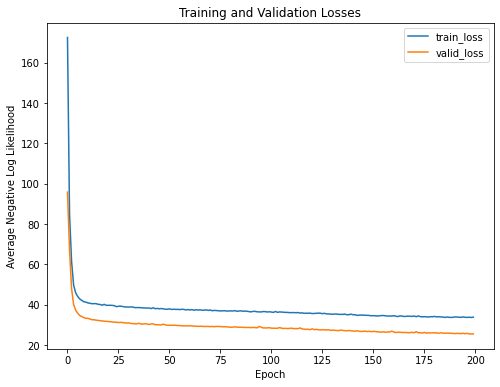

In [107]:
lr = .001
epochs = 200

nin = len(X.columns)
nout = len(y.columns)

size = nin
h_sizes = [nin, int(nin * 1.5), nin]

model = FullyConnectedModel(h_sizes, nout, .25)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)

model, history = train(
    model, 
    criterion, 
    optimizer, 
    dataloaders['train'], 
    dataloaders['valid'],
    max_epochs_stop=10, 
    n_epochs=epochs,
    early_stop=True,
    save_file_name=f'chiller1_tonnage.pt')

plot_loss(history)

Average relative error: 12.8122168382135


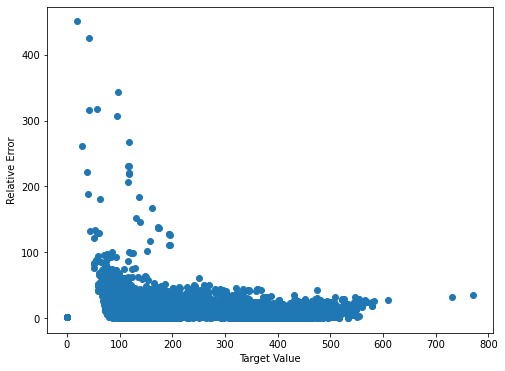

In [108]:
print_power_predictions(model, data['valid'], len(data['valid']), print_every=False, plot=True)

# ANN for chiller2 total cooling

In [109]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['Tonnage']

t_df2 = df2[features + cat_features + targets].dropna()

X = df2[features]
y = df2[targets]

X.describe().to_csv('features_describe.csv')

for col in cat_features:
  X = X.join(pd.get_dummies(df2[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [110]:
batch_size = 200

# Transfer the data from numpy to tensor
data = {
    'train': TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float()),
    'valid': TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float()),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=10),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True, num_workers=10)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


FullyConnectedModel(
  (hidden): ModuleList(
    (0): Linear(in_features=61, out_features=91, bias=True)
    (1): Linear(in_features=91, out_features=61, bias=True)
  )
  (out): Linear(in_features=61, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

Starting Training from Scratch.



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Epoch: 0 	Training Loss: 202.3625 	Validation Loss: 98.0397

Epoch: 1 	Training Loss: 91.3974 	Validation Loss: 81.9533

Epoch: 2 	Training Loss: 78.5225 	Validation Loss: 67.5081

Epoch: 3 	Training Loss: 65.9644 	Validation Loss: 54.8143

Epoch: 4 	Training Loss: 55.6241 	Validation Loss: 45.3769

Epoch: 5 	Training Loss: 49.9387 	Validation Loss: 40.7184

Epoch: 6 	Training Loss: 47.7097 	Validation Loss: 38.8134

Epoch: 7 	Training Loss: 46.7357 	Validation Loss: 37.4480

Epoch: 8 	Training Loss: 45.6744 	Validation Loss: 37.0548

Epoch: 9 	Training Loss: 45.0488 	Validation Loss: 36.1777

Epoch: 10 	Training Loss: 44.4650 	Validation Loss: 35.5945

Epoch: 11 	Training Loss: 44.0984 	Validation Loss: 35.9815

Epoch: 12 	Training Loss: 43.7648 	Validation Loss: 34.9947

Epoch: 13 	Training Loss: 43.1571 	Validation Loss: 34.7618

Epoch: 14 	Training Loss: 43.0646 	Validation Loss: 34.4443

Epoch: 15 	Training Loss: 42.6996 	Validation Loss: 34.2341

Epoch: 16 	Training Loss: 42.433

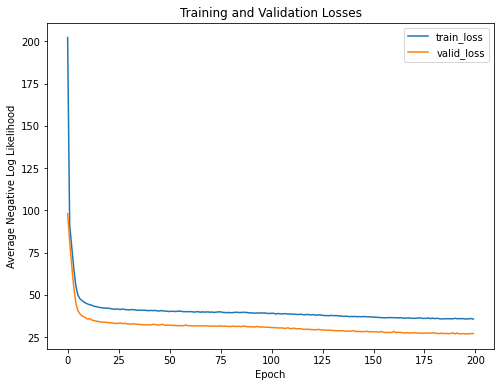

In [111]:
lr = .001
epochs = 200

nin = len(X.columns)
nout = len(y.columns)

size = nin
h_sizes = [nin, int(nin * 1.5), nin]

model = FullyConnectedModel(h_sizes, nout, .25)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)

model, history = train(
    model, 
    criterion, 
    optimizer, 
    dataloaders['train'], 
    dataloaders['valid'],
    max_epochs_stop=10, 
    n_epochs=epochs,
    early_stop=True,
    save_file_name=f'chiller2_tonnage.pt')

plot_loss(history)

Average relative error: 13.458998118173163


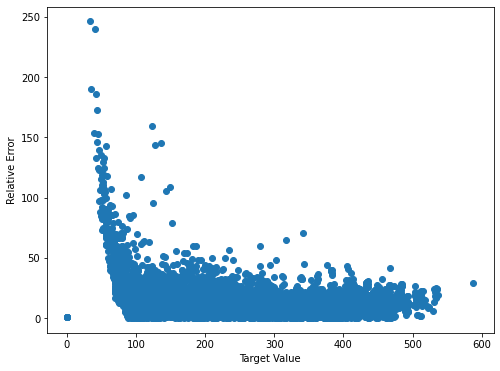

In [112]:
print_power_predictions(model, data['valid'], len(data['valid']), print_every=False, plot=True)

# LSTM

In [17]:
class LSTMDataset(Dataset):
    def __init__(self, X_data, y_data):
        X = Variable(torch.from_numpy(np.array(X_data)).float())
        self.X_data = torch.reshape(X, (X.shape[0], 1, X.shape[1])).float()
        self.y_data = Variable(torch.from_numpy(np.array(y_data).astype(float)))
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [24]:
class LSTMModel(nn.Module):
  def __init__(self, nout, input_size, hidden_size, num_layers, seq_length, dropout=0):
    super(LSTMModel, self).__init__()
    self.nout = nout #number of outputs
    self.num_layers = num_layers #number of layers
    self.input_size = input_size #input size
    self.hidden_size = hidden_size #hidden state
    self.seq_length = seq_length #sequence length

    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
    self.fc_1 = nn.Linear(hidden_size, 128)
    self.fc = nn.Linear(128, nout)

    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(dropout)

  def forward(self,x,hidden):
    batch_size = x.size(0)
    out, hidden = self.lstm(x, hidden)
    out = out.contiguous().view(-1, self.hidden_size)
    out = self.dropout(out)

    out = self.dropout(self.relu(self.fc_1(out)))
    out = self.relu(self.fc(out))
    out = out.view(batch_size, -1)
    out = out[:,-1]
    return out, hidden

  def init_hidden(self, batch_size):
    weight = next(self.parameters()).data
    hidden = (weight.new(self.num_layers, batch_size, self.hidden_size).zero_().to(device),
                  weight.new(self.num_layers, batch_size, self.hidden_size).zero_().to(device))
    return hidden

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# LSTM for chiller1 power consumption

In [21]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['PowChi']

X = df1[features]
y = df1[targets]

for col in cat_features:
  X = X.join(pd.get_dummies(df1[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [22]:
batch_size = 50

data = {
    'train': LSTMDataset(X_train, y_train),
    'valid': LSTMDataset(X_val, y_val),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=False,num_workers=10, drop_last=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=False, num_workers=10, drop_last=True)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [23]:
epochs = 500
lr = .001

nin = len(X.columns)
nout = len(y.columns)
hidden_size = 32
num_layers = 1

lstm = LSTMModel(nout, nin, hidden_size, num_layers, data['train'].X_data.shape[1], dropout=0.4)
lstm = lstm.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=lr)

lstm, history = train_lstm(lstm,
                           criterion,
                           optimizer,
                           dataloaders['train'],
                           dataloaders['valid'], 
                           n_epochs=epochs,
                           batch_size=batch_size,
                           print_every=1, 
                           early_stop=30,
                           save_file_name=f'lstm_chiller1_powchi.pt'
                           )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/500... Step: 806... Loss: 886.166870... Val Loss: 664.477456
Validation loss decreased (inf --> 664.477456).  Saving model ...
Epoch: 2/500... Step: 1612... Loss: 692.604858... Val Loss: 452.278009
Validation loss decreased (664.477456 --> 452.278009).  Saving model ...
Epoch: 3/500... Step: 2418... Loss: 507.784027... Val Loss: 409.368610
Validation loss decreased (452.278009 --> 409.368610).  Saving model ...
Epoch: 4/500... Step: 3224... Loss: 411.164520... Val Loss: 374.415473
Validation loss decreased (409.368610 --> 374.415473).  Saving model ...
Epoch: 5/500... Step: 4030... Loss: 570.354248... Val Loss: 365.042937
Validation loss decreased (374.415473 --> 365.042937).  Saving model ...
Epoch: 6/500... Step: 4836... Loss: 486.390625... Val Loss: 360.716430
Validation loss decreased (365.042937 --> 360.716430).  Saving model ...
Epoch: 7/500... Step: 5642... Loss: 472.975433... Val Loss: 351.433932
Validation loss decreased (360.716430 --> 351.433932).  Saving model ...


In [46]:
test_lstm(lstm, data['valid'], len(data['valid']))

Streaming output truncated to the last 5000 lines.
5077 : Predicted power consumption: tensor([58.5969]) : Actual power consumption: 62.34764481 : Relative Error: 6.015812397003174%
5078 : Predicted power consumption: tensor([185.0823]) : Actual power consumption: 194.2620087 : Relative Error: 4.725407600402832%
5079 : Predicted power consumption: tensor([130.5425]) : Actual power consumption: 127.4260864 : Relative Error: 2.4456844329833984%
5080 : Predicted power consumption: tensor([78.1056]) : Actual power consumption: 90.38865662 : Relative Error: 13.589167594909668%
5081 : Predicted power consumption: tensor([47.2905]) : Actual power consumption: 40.52275848 : Relative Error: 16.70104217529297%
5082 : Predicted power consumption: tensor([55.3678]) : Actual power consumption: 60.18451309 : Relative Error: 8.00327205657959%
5083 : Predicted power consumption: tensor([47.2905]) : Actual power consumption: 58.38182449 : Relative Error: 18.99793815612793%
5084 : Predicted power consum

# LSTM for chiller2 power consumption

In [124]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['PowChi']

X = df2[features]
y = df2[targets]

for col in cat_features:
  X = X.join(pd.get_dummies(df2[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [125]:
batch_size = 50

data = {
    'train': LSTMDataset(X_train, y_train),
    'valid': LSTMDataset(X_val, y_val),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=False,num_workers=10, drop_last=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=False, num_workers=10, drop_last=True)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [126]:
epochs = 500
lr = .001

nin = len(X.columns)
nout = len(y.columns)
hidden_size = 32
num_layers = 1

lstm = LSTMModel(nout, nin, hidden_size, num_layers, data['train'].X_data.shape[1], dropout=0.4)
lstm = lstm.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=lr)

lstm, history = train_lstm(lstm,
                           criterion,
                           optimizer,
                           dataloaders['train'],
                           dataloaders['valid'], 
                           n_epochs=epochs,
                           batch_size=batch_size,
                           print_every=1, 
                           early_stop=20,
                           save_file_name=f'lstm_chiller2_powchi.pt'
                           )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/500... Step: 606... Loss: 1084.933960... Val Loss: 939.930459
Validation loss decreased (inf --> 939.930459).  Saving model ...
Epoch: 2/500... Step: 1212... Loss: 1000.271423... Val Loss: 786.232044
Validation loss decreased (939.930459 --> 786.232044).  Saving model ...
Epoch: 3/500... Step: 1818... Loss: 1325.507812... Val Loss: 738.986810
Validation loss decreased (786.232044 --> 738.986810).  Saving model ...
Epoch: 4/500... Step: 2424... Loss: 1017.740845... Val Loss: 697.737446
Validation loss decreased (738.986810 --> 697.737446).  Saving model ...
Epoch: 5/500... Step: 3030... Loss: 646.349121... Val Loss: 635.694942
Validation loss decreased (697.737446 --> 635.694942).  Saving model ...
Epoch: 6/500... Step: 3636... Loss: 846.074768... Val Loss: 614.303303
Validation loss decreased (635.694942 --> 614.303303).  Saving model ...
Epoch: 7/500... Step: 4242... Loss: 724.739075... Val Loss: 590.257029
Validation loss decreased (614.303303 --> 590.257029).  Saving model 

In [127]:
test_lstm(lstm, data['valid'])

Average relative error: 10.284712321566436


# LSTM for chiller1 total cooling

In [29]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['Tonnage']

t_df1 = df1[features + cat_features + targets].dropna()

X = t_df1[features]
y = t_df1[targets]

for col in cat_features:
  X = X.join(pd.get_dummies(t_df1[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [30]:
batch_size = 50

data = {
    'train': LSTMDataset(X_train, y_train),
    'valid': LSTMDataset(X_val, y_val),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=False,num_workers=10, drop_last=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=False, num_workers=10, drop_last=True)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [37]:
epochs = 500
lr = .001

nin = len(X.columns)
nout = len(y.columns)
hidden_size = 32
num_layers = 1

lstm = LSTMModel(nout, nin, hidden_size, num_layers, data['train'].X_data.shape[1], dropout=0.4)
lstm = lstm.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=lr)

lstm, history = train_lstm(lstm,
                           criterion,
                           optimizer,
                           dataloaders['train'],
                           dataloaders['valid'], 
                           n_epochs=epochs,
                           batch_size=batch_size,
                           print_every=1, 
                           early_stop=20,
                           save_file_name=f'lstm_chiller1_tonnage.pt'
                           )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/500... Step: 735... Loss: 3243.174072... Val Loss: 3126.642159
Validation loss decreased (inf --> 3126.642159).  Saving model ...
downloading model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 2/500... Step: 1470... Loss: 3039.496094... Val Loss: 2392.366918
Validation loss decreased (3126.642159 --> 2392.366918).  Saving model ...
Epoch: 3/500... Step: 2205... Loss: 3307.773438... Val Loss: 2195.406465
Validation loss decreased (2392.366918 --> 2195.406465).  Saving model ...
Epoch: 4/500... Step: 2940... Loss: 2352.078613... Val Loss: 2040.865115
Validation loss decreased (2195.406465 --> 2040.865115).  Saving model ...
Epoch: 5/500... Step: 3675... Loss: 3308.859863... Val Loss: 2028.453497
Validation loss decreased (2040.865115 --> 2028.453497).  Saving model ...
Epoch: 6/500... Step: 4410... Loss: 2579.548096... Val Loss: 1923.091318
Validation loss decreased (2028.453497 --> 1923.091318).  Saving model ...
Epoch: 7/500... Step: 5145... Loss: 3338.309326... Val Loss: 1882.414146
Validation loss decreased (1923.091318 --> 1882.414146).  Saving model ...
Epoch: 8/500... Step: 5880... Loss: 2845.016113... Val Loss: 1816.104578
Validation loss decreased (1882.414146 

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1e7fd0ea70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1e7fd0ea70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch: 58/500... Step: 42630... Loss: 1085.773682... Val Loss: 1247.824971
Epoch: 59/500... Step: 43365... Loss: 1022.134949... Val Loss: 1219.299020
Validation loss decreased (1227.406695 --> 1219.299020).  Saving model ...
Epoch: 60/500... Step: 44100... Loss: 1865.348999... Val Loss: 1233.273707
Epoch: 61/500... Step: 44835... Loss: 1692.243042... Val Loss: 1226.304454
Epoch: 62/500... Step: 45570... Loss: 1157.744995... Val Loss: 1220.557526
Epoch: 63/500... Step: 46305... Loss: 1634.992798... Val Loss: 1215.516891
Validation loss decreased (1219.299020 --> 1215.516891).  Saving model ...
Epoch: 64/500... Step: 47040... Loss: 1601.200562... Val Loss: 1224.584209
Epoch: 65/500... Step: 47775... Loss: 1581.936890... Val Loss: 1206.189689
Validation loss decreased (1215.516891 --> 1206.189689).  Saving model ...
Epoch: 66/500... Step: 48510... Loss: 1701.464600... Val Loss: 1221.968717
Epoch: 67/500... Step: 49245... Loss: 1543.091553... Val Loss: 1206.528574
Epoch: 68/500... Step: 49

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 102/500... Step: 74970... Loss: 1502.886353... Val Loss: 1169.230130
Epoch: 103/500... Step: 75705... Loss: 1360.847412... Val Loss: 1115.125199
Epoch: 104/500... Step: 76440... Loss: 1425.960938... Val Loss: 1129.109952
Epoch: 105/500... Step: 77175... Loss: 1263.774292... Val Loss: 1118.608394
Epoch: 106/500... Step: 77910... Loss: 995.037964... Val Loss: 1124.101400
Epoch: 107/500... Step: 78645... Loss: 1183.204712... Val Loss: 1137.140983
Epoch: 108/500... Step: 79380... Loss: 1714.395020... Val Loss: 1107.437871
Validation loss decreased (1109.799065 --> 1107.437871).  Saving model ...
Epoch: 109/500... Step: 80115... Loss: 1094.781128... Val Loss: 1105.344813
Validation loss decreased (1107.437871 --> 1105.344813).  Saving model ...
Epoch: 110/500... Step: 80850... Loss: 1206.700439... Val Loss: 1091.936022
Validation loss decreased (1105.344813 --> 1091.936022).  Saving model ...
Epoch: 111/500... Step: 81585... Loss: 1308.224487... Val Loss: 1122.003555
Epoch: 112/500..

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 202/500... Step: 148470... Loss: 1005.920471... Val Loss: 1027.834451
Epoch: 203/500... Step: 149205... Loss: 1248.754639... Val Loss: 1013.794818
Validation loss decreased (1018.852085 --> 1013.794818).  Saving model ...
Epoch: 204/500... Step: 149940... Loss: 987.704834... Val Loss: 1017.424353
Epoch: 205/500... Step: 150675... Loss: 1028.189697... Val Loss: 1013.777218
Validation loss decreased (1013.794818 --> 1013.777218).  Saving model ...
Epoch: 206/500... Step: 151410... Loss: 1202.092041... Val Loss: 1014.737603
Epoch: 207/500... Step: 152145... Loss: 860.771240... Val Loss: 1010.800181
Validation loss decreased (1013.777218 --> 1010.800181).  Saving model ...
Epoch: 208/500... Step: 152880... Loss: 1114.174683... Val Loss: 1011.761837
Epoch: 209/500... Step: 153615... Loss: 1117.512207... Val Loss: 1009.734520
Validation loss decreased (1010.800181 --> 1009.734520).  Saving model ...
Epoch: 210/500... Step: 154350... Loss: 1283.227661... Val Loss: 1012.294451
Epoch: 21

In [38]:
test_lstm(lstm, data['valid'])

Average relative error: 12.226459967911698


# LSTM for chiller2 total cooling

In [40]:
# choose different predictive weather and date features
features = ['TempAmbient', 'Humidity(%)', 'Precip.(in)', 'Dew Point(F)', 'Pressure(in)']
cat_features = ['Condition', 'hour', 'weekday'] #'Condition', 
targets = ['Tonnage']

t_df2 = df2[features + cat_features + targets].dropna()

X = t_df2[features]
y = t_df2[targets]

for col in cat_features:
  X = X.join(pd.get_dummies(t_df2[col], prefix=col))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
y_train, y_val = y_train.astype(float), y_val.astype(float)

In [41]:
batch_size = 50

data = {
    'train': LSTMDataset(X_train, y_train),
    'valid': LSTMDataset(X_val, y_val),
}

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=False,num_workers=10, drop_last=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=False, num_workers=10, drop_last=True)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [42]:
epochs = 500
lr = .001

nin = len(X.columns)
nout = len(y.columns)
hidden_size = 32
num_layers = 1

lstm = LSTMModel(nout, nin, hidden_size, num_layers, data['train'].X_data.shape[1], dropout=0.4)
lstm = lstm.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=lr)

lstm, history = train_lstm(lstm,
                           criterion,
                           optimizer,
                           dataloaders['train'],
                           dataloaders['valid'], 
                           n_epochs=epochs,
                           batch_size=batch_size,
                           print_every=1, 
                           early_stop=20,
                           save_file_name=f'lstm_chiller2_tonnage.pt'
                           )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/500... Step: 605... Loss: 3348.399414... Val Loss: 3169.100136
Validation loss decreased (inf --> 3169.100136).  Saving model ...
downloading model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 2/500... Step: 1210... Loss: 5382.969727... Val Loss: 2455.062657
Validation loss decreased (3169.100136 --> 2455.062657).  Saving model ...
Epoch: 3/500... Step: 1815... Loss: 4308.697266... Val Loss: 2205.659819
Validation loss decreased (2455.062657 --> 2205.659819).  Saving model ...
Epoch: 4/500... Step: 2420... Loss: 2887.534912... Val Loss: 2077.528815
Validation loss decreased (2205.659819 --> 2077.528815).  Saving model ...
Epoch: 5/500... Step: 3025... Loss: 4360.730469... Val Loss: 1923.745567
Validation loss decreased (2077.528815 --> 1923.745567).  Saving model ...
Epoch: 6/500... Step: 3630... Loss: 2703.325684... Val Loss: 1830.065339
Validation loss decreased (1923.745567 --> 1830.065339).  Saving model ...
Epoch: 7/500... Step: 4235... Loss: 3349.500977... Val Loss: 1771.039444
Validation loss decreased (1830.065339 --> 1771.039444).  Saving model ...
Epoch: 8/500... Step: 4840... Loss: 4215.540039... Val Loss: 1721.646742
Validation loss decreased (1771.039444 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 102/500... Step: 61710... Loss: 1145.853271... Val Loss: 879.890485
Epoch: 103/500... Step: 62315... Loss: 1307.075073... Val Loss: 882.385591
Epoch: 104/500... Step: 62920... Loss: 972.675659... Val Loss: 867.228481
Epoch: 105/500... Step: 63525... Loss: 1397.779053... Val Loss: 873.093021
Epoch: 106/500... Step: 64130... Loss: 1347.590942... Val Loss: 865.412342
Epoch: 107/500... Step: 64735... Loss: 1145.593750... Val Loss: 864.838610
Epoch: 108/500... Step: 65340... Loss: 946.563599... Val Loss: 863.188421
Validation loss decreased (864.699238 --> 863.188421).  Saving model ...
Epoch: 109/500... Step: 65945... Loss: 1807.253906... Val Loss: 850.710607
Validation loss decreased (863.188421 --> 850.710607).  Saving model ...
Epoch: 110/500... Step: 66550... Loss: 1683.729004... Val Loss: 860.250486
Epoch: 111/500... Step: 67155... Loss: 1761.560547... Val Loss: 876.412430
Epoch: 112/500... Step: 67760... Loss: 885.013550... Val Loss: 853.795754
Epoch: 113/500... Step: 68365...

In [43]:
test_lstm(lstm, data['valid'])

Average relative error: 11.627457701838852


# Download

In [44]:
from google.colab import files
files.downlaod('lstm_chiller1_powchi.pt')
files.download('lstm_chiller2_powchi.pt')
files.download('lstm_chiller1_tonnage.pt')
files.download('lstm_chiller2_tonnage.pt')

AttributeError: ignored